## OBJECTIVE 

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.


## Domain Analysis

1. In the given dataset we have the following columns Airline, Date_of_Journey, Source, Destination, Route,	      Dep_Time,	Arrival_Time, Duration,	Total_Stops, Additional_Info and Price.
   - Airlines tells us about the different airlines in the market and their marketshares.
   - Source is the origin of the flights.
   - Route tells us what route did the flight take to fly from its source to the destination.
   - Additional info has additional services which may affec the price of the ticket.
   
2. The Aviation industry is a very volatile industry in terms of ticket pricing. The slightest of variation in any factor/feature can lead to a change in the Price of tickets. This makes things unpredictable and everchanging. 

3. The Indian Avaiation industry is a rapidly growing sector. The ministry's data shows a total of 4,56,082 passengers flew via 2,978 flights on April 30,2023 and there were a total of 5,947 flight movements. All these passengers but all these passengers belong to the upper strata of the society and still air travel is not accesible for the lower class.


### 1. Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

### 2. Importing the Data

In [3]:
data=pd.read_csv("Flight_Fare.csv")

In [4]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### 3. Checking for Null values 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# There are null values in the dataset.

 ### 4. General info about the Data

In [7]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### 5. Exploratory Data Analysis 

#### A. Univariant Analysis 

In [8]:
import sweetviz as sv # library for univariant analysis
my_report=sv.analyze(data) # passing the original dataframe
my_report.show_html() # arguments will generate to// the library 

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
data.select_dtypes(include=['int64','float64']).columns

Index(['Price'], dtype='object')

In [10]:
data.select_dtypes(include=['object']).columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

## 
1. Jet Airways commands the largest market share at 36%, followed by Indigo at 19%.
2. The additional information column holds little value as most of the data is missing.
3. Delhi emerges as the most popular departure point, while Chennai sees the least popularity.
4. Cochin stands out as the most frequented destination, while Kolkata ranks as the least preferred.
5. The most commonly traveled route is from Delhi to Bombay, with Cochin as the final destination.
6. The average flight duration is 170 minutes.
7. The average flight price is ₹ 3,897.
8. Approximately 53% of flights include one layover/stop, while 33% are non-stop.

####  

#### B. Bivariant Analysis

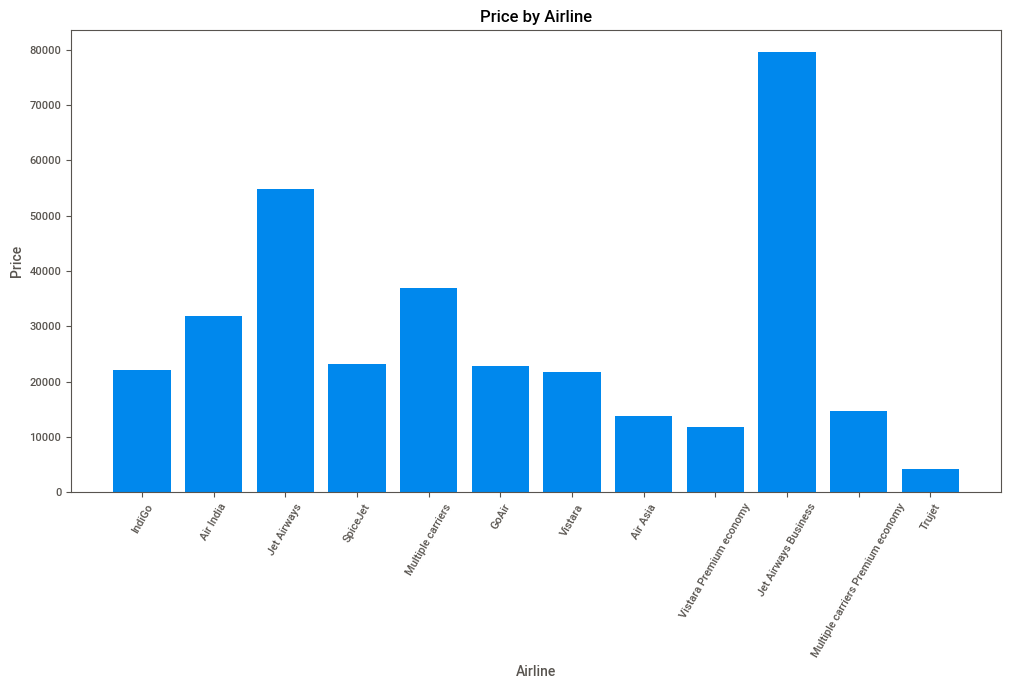

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(data['Airline'],data['Price'])
plt.title('Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.show()

In [12]:
# Jet Airways Business offers the highest-priced airline service, while Trujet provides the most cost-effective option.

<function matplotlib.pyplot.show(close=None, block=None)>

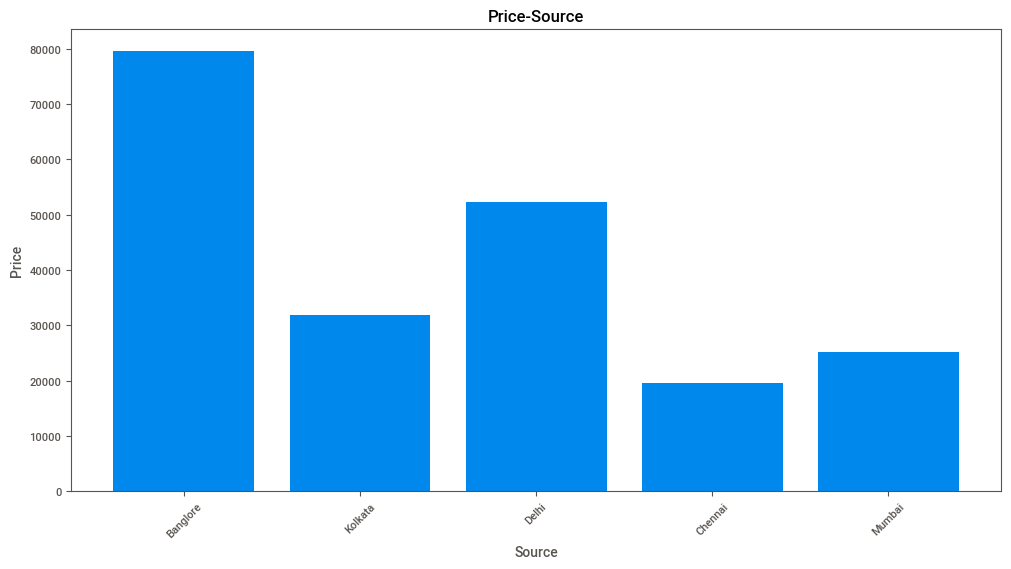

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(data['Source'],data['Price'])
plt.title('Price-Source')
plt.xlabel('Source')
plt.ylabel('Price')
plt.xticks(rotation=45)  
plt.show

In [14]:
# Traveling from Bangalore is the most expensive, whereas Chennai is the least costly.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

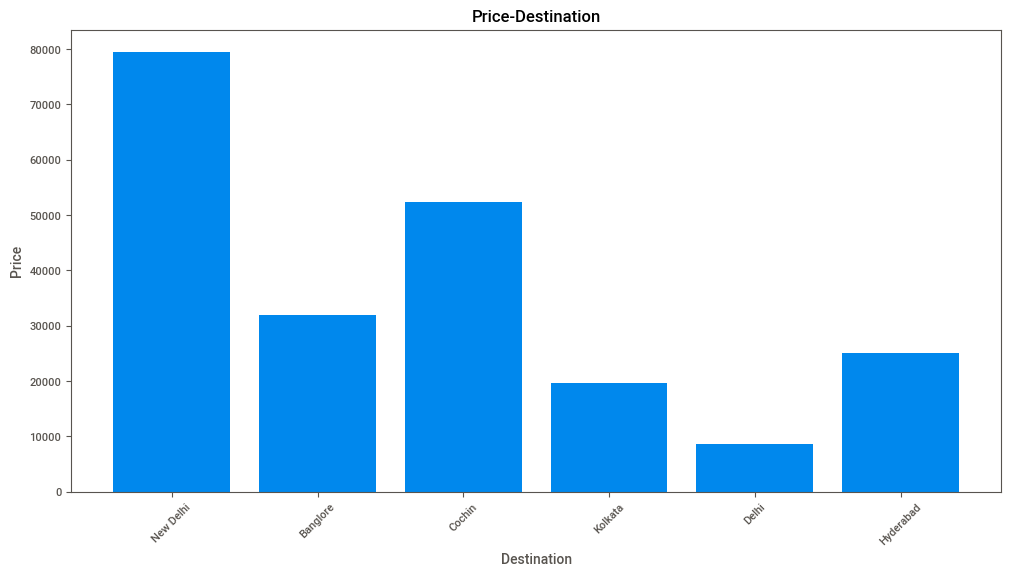

In [15]:
plt.figure(figsize=(12, 6))
plt.bar(data['Destination'],data['Price'])
plt.title('Price-Destination')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.xticks(rotation=45)  

In [16]:
# New Delhi stands out as the most expensive destination, whereas Delhi is the most affordable.

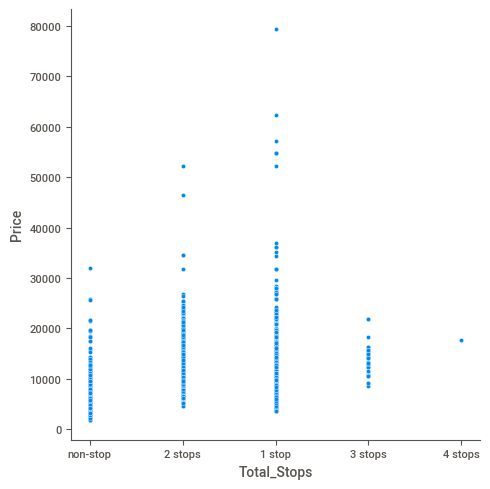

In [17]:
sns.relplot(x='Total_Stops', y='Price', data=data)
plt.show()


In [18]:
# Non Stop Flights are the most cost effecient option whereas 1 stoppers can be the most expensive option.

#### C. Multi Variant Analysis

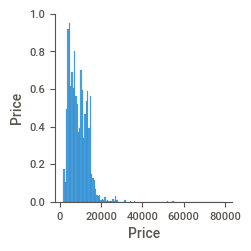

In [19]:
sns.pairplot(data)

### 6. Data Preprocessing and Feature Engineering

#### Converting Categorical data into Numerical data 

In [20]:

data = pd.read_csv("Flight_Fare.csv")  
 
# Convert loaded data to DataFrame if it's a list
if isinstance(data, list):
    data = pd.DataFrame(data)

# Function to convert duration to minutes
def convert_to_minutes(duration):
    parts = duration.split()
    hours = 0
    minutes = 0
    for part in parts:
        if 'h' in part:
            hours = int(part.strip('h'))
        elif 'm' in part:
            minutes = int(part.strip('m'))
    return hours * 60 + minutes

# Apply conversion to 'Duration' column in the dataset
data['Duration'] = data['Duration'].apply(convert_to_minutes)

# Rename the column to reflect the conversion
data.rename(columns={'Duration': 'duration_minutes'}, inplace=True)

# Display the updated DataFrame
print(data)

# Optionally, save the updated dataset to a new file
# data.to_csv('updated_dataset.csv', index=False)  # Replace 'updated_dataset.csv' with the desired file name

           Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time  duration_minutes  \
0                  BLR ? DEL    22:20  01:10 22 Mar               170   
1      CCU ? IXR ? BBI ? BLR    05:50         13:15               445   
2      DEL ? LKO ? BOM ? COK    09:25  04:25 10 Jun         

In [21]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,duration_minutes,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1 stop,No info,13302


In [22]:
# Method 1- Manual Encoding 

In [23]:
# Destination

In [24]:
data.Destination.value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [25]:
data.Destination=data.Destination.map({'Cochin':'0','Banglore':'1','Delhi':'2','New Delhi':'3','Hyderabad':'4','Kolkata':'5'})
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,duration_minutes,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,3,BLR ? DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,1,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,0,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,1,CCU ? NAG ? BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,3,BLR ? NAG ? DEL,16:50,21:35,285,1 stop,No info,13302


In [26]:
# Source

In [27]:
data.Source.value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [28]:
data.Source=data.Source.map({'Delhi':'0','Kolkata':'1','Banglore':'2','Mumbai':'3','Chennai':'4'})
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,duration_minutes,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,2,3,BLR ? DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,1,1,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,0,0,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,1,1,CCU ? NAG ? BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,2,3,BLR ? NAG ? DEL,16:50,21:35,285,1 stop,No info,13302


In [29]:
# Airline

In [30]:
data.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [31]:
data.Airline=data.Airline.map({'Jet Airways':'0','IndiGo':'1','Air India':'2','Multiple carriers':'3','SpiceJet':'4','Vistara':'5','Air Asia':'6','GoAir':'7','Multiple carriers Premium economy':'8','Jet Airways Business':'9','Vistara Premium economy':'10','Trujet':'11'})
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,duration_minutes,Total_Stops,Additional_Info,Price
0,1,24/03/2019,2,3,BLR ? DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,2,1/05/2019,1,1,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2 stops,No info,7662
2,0,9/06/2019,0,0,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,1,12/05/2019,1,1,CCU ? NAG ? BLR,18:05,23:30,325,1 stop,No info,6218
4,1,01/03/2019,2,3,BLR ? NAG ? DEL,16:50,21:35,285,1 stop,No info,13302


In [32]:
# Additional Info

In [33]:
data.Additional_Info.value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [34]:
data.Additional_Info=data.Additional_Info.map({'No info':'0','No Info':'0','In-flight meal not included':'1','No check-in baggage included':'2','1 Long layover':'3','Change airports':'4','Business class':'5','1 Short layover':'6','Red-eye flight':'7','2 Long layover':'8'})
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,duration_minutes,Total_Stops,Additional_Info,Price
0,1,24/03/2019,2,3,BLR ? DEL,22:20,01:10 22 Mar,170,non-stop,0,3897
1,2,1/05/2019,1,1,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2 stops,0,7662
2,0,9/06/2019,0,0,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2 stops,0,13882
3,1,12/05/2019,1,1,CCU ? NAG ? BLR,18:05,23:30,325,1 stop,0,6218
4,1,01/03/2019,2,3,BLR ? NAG ? DEL,16:50,21:35,285,1 stop,0,13302


In [35]:
# Method 2- Label Encoding

In [36]:
data_encoder=data
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
# Total Stops
data_encoder.Total_Stops=lc.fit_transform(data_encoder.Total_Stops)
# Departure Time
data_encoder.Dep_Time=lc.fit_transform(data_encoder.Dep_Time)
# Arrival Time 
data_encoder.Arrival_Time=lc.fit_transform(data_encoder.Arrival_Time)

In [37]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,duration_minutes,Total_Stops,Additional_Info,Price
0,1,24/03/2019,2,3,BLR ? DEL,211,233,170,4,0,3897
1,2,1/05/2019,1,1,CCU ? IXR ? BBI ? BLR,31,906,445,1,0,7662
2,0,9/06/2019,0,0,DEL ? LKO ? BOM ? COK,70,413,1140,1,0,13882
3,1,12/05/2019,1,1,CCU ? NAG ? BLR,164,1324,325,0,0,6218
4,1,01/03/2019,2,3,BLR ? NAG ? DEL,149,1237,285,0,0,13302


In [38]:
# Spliting Date_of_Journey Column into Days, Months and Year Respectively.

In [39]:
data[['Day', 'Month', 'Year']] = data['Date_of_Journey'].str.split('/', expand=True)

# Convert to numeric format if needed
data['Day'] = pd.to_numeric(data['Day'])
data['Month'] = pd.to_numeric(data['Month'])
data['Year'] = pd.to_numeric(data['Year'])

In [40]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,duration_minutes,Total_Stops,Additional_Info,Price,Day,Month,Year
0,1,24/03/2019,2,3,BLR ? DEL,211,233,170,4,0,3897,24,3,2019
1,2,1/05/2019,1,1,CCU ? IXR ? BBI ? BLR,31,906,445,1,0,7662,1,5,2019
2,0,9/06/2019,0,0,DEL ? LKO ? BOM ? COK,70,413,1140,1,0,13882,9,6,2019
3,1,12/05/2019,1,1,CCU ? NAG ? BLR,164,1324,325,0,0,6218,12,5,2019
4,1,01/03/2019,2,3,BLR ? NAG ? DEL,149,1237,285,0,0,13302,1,3,2019


In [41]:
# Dropping Route column and Date_of_Journey column as there is no relation with the Target (Price).

In [42]:
data.drop(columns=['Date_of_Journey'], inplace=True)
data.drop(columns=['Route'], inplace=True)

In [43]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,duration_minutes,Total_Stops,Additional_Info,Price,Day,Month,Year
0,1,2,3,211,233,170,4,0,3897,24,3,2019
1,2,1,1,31,906,445,1,0,7662,1,5,2019
2,0,0,0,70,413,1140,1,0,13882,9,6,2019
3,1,1,1,164,1324,325,0,0,6218,12,5,2019
4,1,2,3,149,1237,285,0,0,13302,1,3,2019


### 7. Feature Selection 

In [44]:
# Checking for correlation 

In [45]:
corr_data=data[['Airline','Source','Destination','Dep_Time','Arrival_Time','duration_minutes','Total_Stops','Day','Month','Price']]

<Axes: >

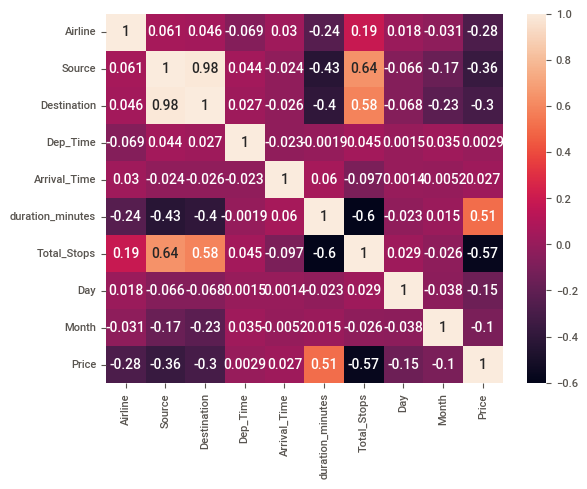

In [46]:
sns.heatmap(corr_data.corr(),annot=True)

In [72]:
# There is no major correlation between the features. only Source and Destination have correlation but neither can be dropped as they are both important features and affect the target.

In [47]:
data

,Airline,Source,Destination,Dep_Time,Arrival_Time,duration_minutes,Total_Stops,Additional_Info,Price,Day,Month,Year
0,1,2,3,211,233,170,4,0,3897,24,3,2019
1,2,1,1,31,906,445,1,0,7662,1,5,2019
2,0,0,0,70,413,1140,1,0,13882,9,6,2019
3,1,1,1,164,1324,325,0,0,6218,12,5,2019
4,1,2,3,149,1237,285,0,0,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,6,1,1,183,1259,150,4,0,4107,9,4,2019
10679,2,1,1,193,1305,155,4,0,4145,27,4,2019
10680,0,2,2,58,824,180,4,0,7229,27,4,2019
10681,5,2,3,92,938,160,4,0,12648,1,3,2019


In [48]:
X=data.drop('Price',axis=1)
y=data.Price

In [49]:
X.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,duration_minutes,Total_Stops,Additional_Info,Day,Month,Year
0,1,2,3,211,233,170,4,0,24,3,2019
1,2,1,1,31,906,445,1,0,1,5,2019
2,0,0,0,70,413,1140,1,0,9,6,2019
3,1,1,1,164,1324,325,0,0,12,5,2019
4,1,2,3,149,1237,285,0,0,1,3,2019


In [50]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

### 8. Splitting Data into Train and Test Split

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 9. Scaling the Data 

In [52]:
from sklearn.preprocessing import MinMaxScaler 
scale=MinMaxScaler()

In [53]:
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

### 10. Model Creation

In [54]:
# linear Regression Model 

In [55]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score


# Creating a linear regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
predictions = model.predict(X_test)

# Calculating and printing mean squared error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculating and printing R-squared
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)


Mean Squared Error: 12663039.932733048
R-squared: 0.4016698052048475


In [56]:
# Gradient Boost Model 

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score



# Creating a Gradient Boosting Regressor
gbm = GradientBoostingRegressor()

# Training the model on the training data
gbm.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = gbm.predict(X_test)

# Calculating mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 6790693.633704262
R-squared: 0.6791388903271394


In [58]:
# Gradient Boost Hypertuning Parameters

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# Creating a Gradient Boosting Regressor
gbm = GradientBoostingRegressor()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5]  # Maximum depth of the individual estimators
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Mean Squared Error: 7020716.304209563
R-squared: 0.6682702908453533


In [60]:
# Support Vector Machine (SVM) Model

In [61]:
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score



# Creating a Support Vector Machine (SVM) regression model
svm = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.

# Training the model on the training data
svm.fit(X_train, y_train)

# Making predictions on the testing data
predictions = svm.predict(X_test)

# Calculating mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculating R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


Mean Squared Error: 17858645.07258685
R-squared: 0.1561768231151609


In [62]:
# Hypertuning Parameters for SVM

In [63]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# Define the grid of hyperparameters to search
param_grid = {
    'kernel': ['linear', 'rbf'],  # Kernel type
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'gamma': ['scale', 'auto']     # Kernel coefficient for 'rbf' kernel
}

# Creating a Support Vector Machine (SVM) regression model
svm = SVR()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


Best Hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Squared Error: 11620051.003938563
R-squared: 0.45095116041258576


In [64]:
# Random Forest Model

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Creating a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Fitting the model on the training data
rf.fit(X_train, y_train)

# Making predictions on the testing data
predictions = rf.predict(X_test)

# Calculating mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculating R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


Mean Squared Error: 4460514.750749093
R-squared: 0.7892401292359867


In [66]:
# XG Boost Model

In [67]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Encode categorical features
data_encoded = pd.get_dummies(data, columns=['Airline', 'Source', 'Destination', 'Additional_Info'])

# Splitting the encoded data into training and testing sets
X = data_encoded.drop(columns=['Price'])
y = data_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Setting XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Use regression objective function
    'eval_metric': 'rmse'             # Use root mean squared error (RMSE) as evaluation metric
}

# Training the model
num_rounds = 100  # Number of boosting rounds
xg_reg = xgb.train(params, dtrain, num_rounds)

# Making predictions on the testing data
predictions = xg_reg.predict(dtest)

# Calculating mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculating R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


Mean Squared Error: 2135416.999444839
R-squared: 0.899101284049181


In [68]:
# Decision Tree Model

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



# Creating a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters like max_depth, min_samples_split, etc.

# Fitting the model on the training data
dt.fit(X_train, y_train)

# Making predictions on the testing data
predictions = dt.predict(X_test)

# Calculating mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculating R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


Mean Squared Error: 2664931.960666563
R-squared: 0.8740816369835682


In [70]:
# Hyperparameter Tuning for Descision Tree

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Creating a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 4, 5, None],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mean Squared Error: 3577389.44954139
R-squared: 0.8309679083717262


# Model Comparison Report  

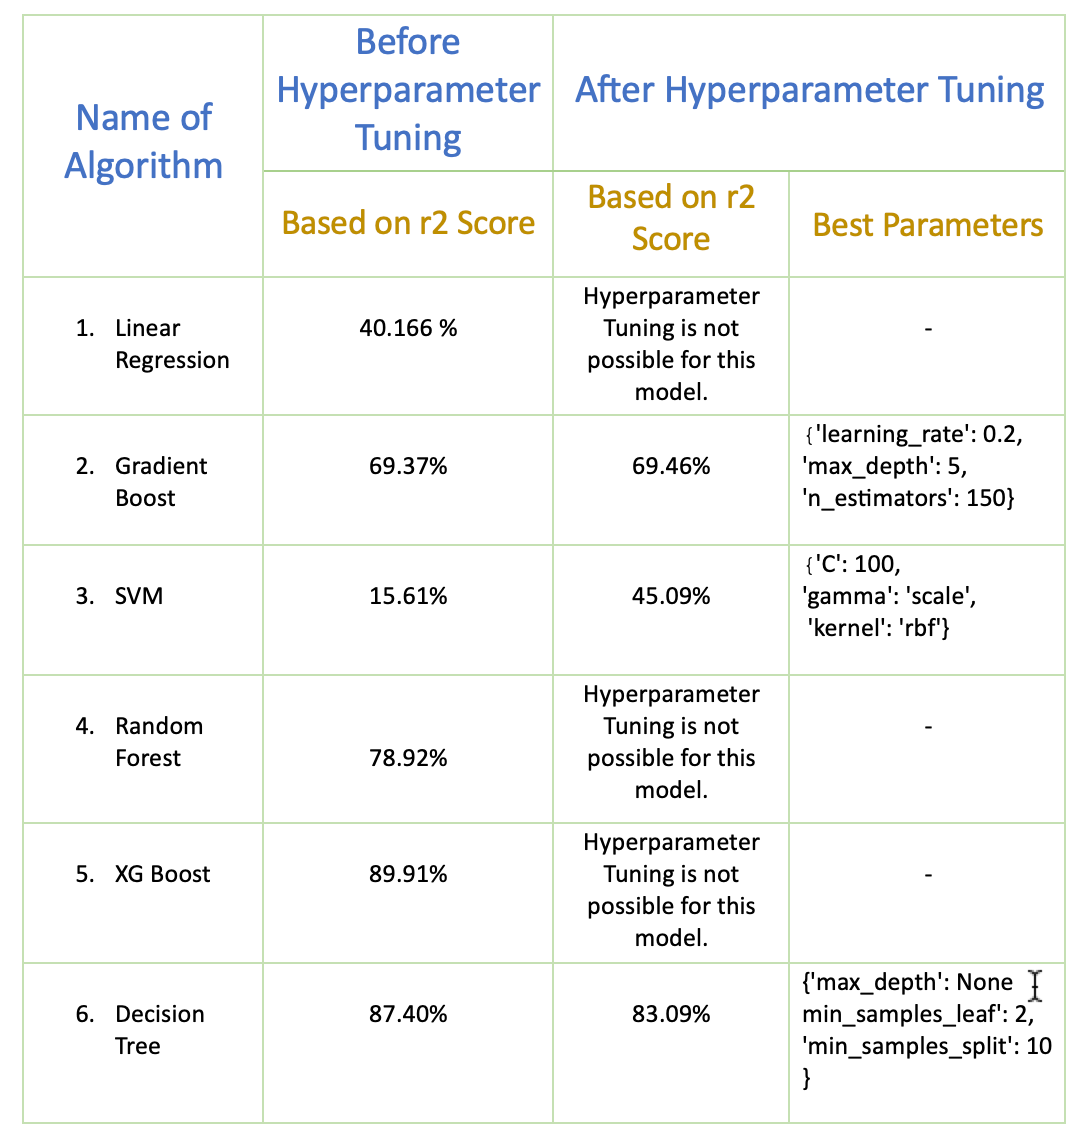 

#### From the above table it can been seen that XG Boost Model has provided the best accuracy with 89.91% whereas  SVM without Hyperparameter Tuning has given the worst result with 15.61%.

### Challenges Faced 

1. We encountered numerous challenges in selecting the appropriate kernel and parameters when developing          various models.
2. The process of tuning hyperparameters for the models proved to be quite challenging.
3. Converting the "Duration" column's categorical data to a numerical format posed a significant challenge due    to variations in formatting across different rows, necessitating the standardization of all entries.